In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("seer_encoded.csv")

X = df.drop(columns=['Survival Months'])
y = df['Survival Months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.neural_network import MLPRegressor

In [11]:

model = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),  
    activation='relu',
    solver='adam',
    alpha=0.001,             
    learning_rate='adaptive',
    learning_rate_init=0.00001,
    max_iter=10000,
    random_state=87,
    early_stopping=True,
    n_iter_no_change=25,
    tol=1e-5,
    verbose=True
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Iteration 1, loss = 0.06915390
Validation score: -1.950588
Iteration 2, loss = 0.05702329
Validation score: -1.448406
Iteration 3, loss = 0.04751479
Validation score: -1.063010
Iteration 4, loss = 0.04050118
Validation score: -0.778665
Iteration 5, loss = 0.03559153
Validation score: -0.576353
Iteration 6, loss = 0.03229136
Validation score: -0.440890
Iteration 7, loss = 0.03022281
Validation score: -0.349644
Iteration 8, loss = 0.02888656
Validation score: -0.290741
Iteration 9, loss = 0.02806818
Validation score: -0.252041
Iteration 10, loss = 0.02757426
Validation score: -0.223999
Iteration 11, loss = 0.02723951
Validation score: -0.204232
Iteration 12, loss = 0.02697005
Validation score: -0.189700
Iteration 13, loss = 0.02676578
Validation score: -0.176869
Iteration 14, loss = 0.02656734
Validation score: -0.168030
Iteration 15, loss = 0.02639505
Validation score: -0.157879
Iteration 16, loss = 0.02621850
Validation score: -0.149442
Iteration 17, loss = 0.02605486
Validation score:

In [21]:
from sklearn.ensemble import RandomForestRegressor

R² Score: -0.03132939541193491
RMSE: 0.21494925607797274


C:\Users\jdogt\AppData\Local\Temp\ipykernel_18936\2705219472.py:25: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jdogt\Desktop\CS-Tools&Code\ML-Final\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


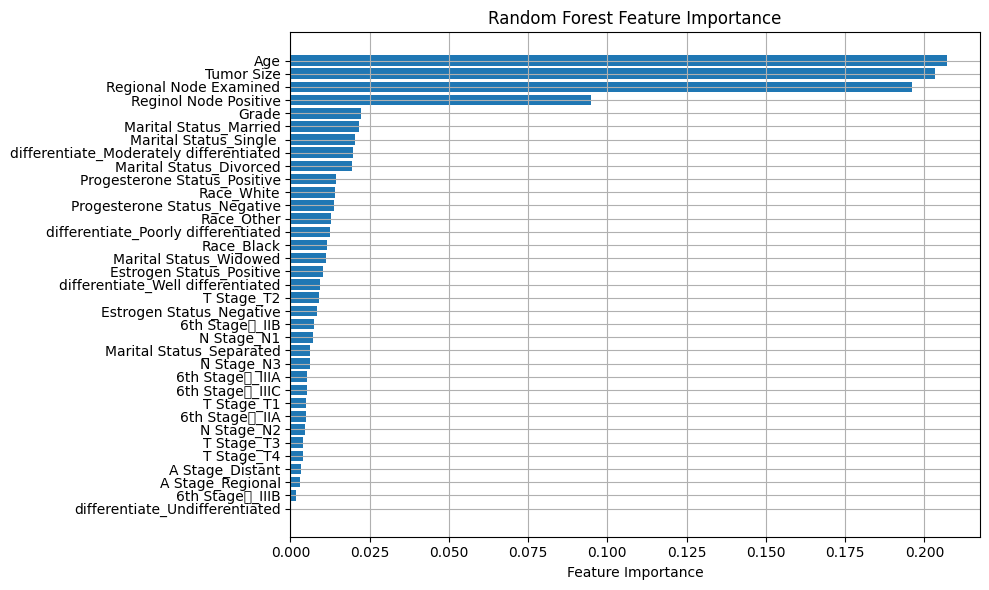

In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


importances = model.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

R² Score: -0.04333389285649525
RMSE: 0.21619662304963022


c:\Users\jdogt\Desktop\CS-Tools&Code\ML-Final\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


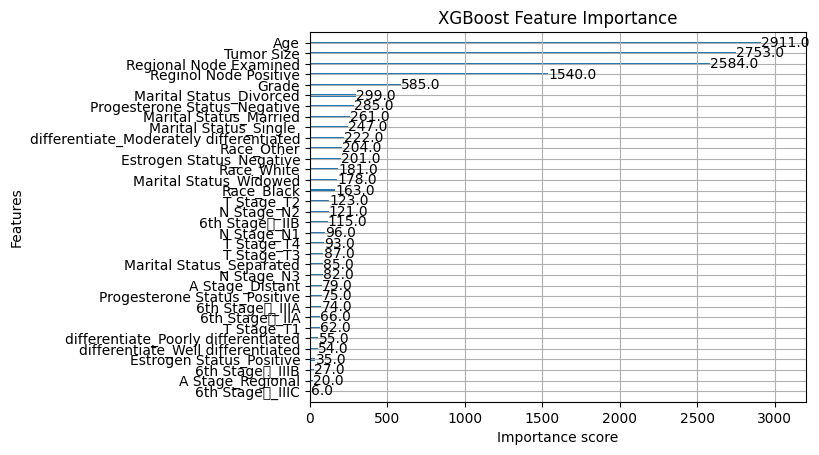

In [24]:
model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
model = KNeighborsRegressor(
    n_neighbors=5,      
    weights='distance', 
    algorithm='auto'    
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: -0.2026958023748786
RMSE: 0.23212138104613608
